## **02_eda_visuals.ipynb**

### Objectives

* Carry out exploratory data analysis
*
*

### Inputs

*
*
*

### Outputs

*
*
*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [46]:
# load the cleaned data in to a dataframe
df = pd.read_csv('../data/data_clean.csv')
df.head(20)

,PetType,Breed,AgeMonths,Colour,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,AgeInYears
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0,10.916667
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0,6.083333
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0,11.333333
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0,8.083333
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0,10.250000
5,Dog,Labrador,70,Brown,Large,20.986261,0,0,87,301,1,0,5.833333
6,Bird,Parakeet,169,Brown,Small,10.902613,1,0,70,440,1,0,14.083333
7,Cat,Siamese,13,Orange,Large,7.252683,1,0,3,137,0,1,1.083333
8,Bird,Parakeet,49,Brown,Medium,24.597598,1,1,69,405,0,0,4.083333
9,Bird,Parakeet,60,Gray,Large,7.295994,0,0,73,231,1,0,5.000000


In [8]:
df.describe()

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,AgeInYears
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351,7.689960
std,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730,4.345697
min,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.083333
25%,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000,4.000000
50%,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000,7.833333
75%,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000,11.500000
max,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000,14.916667


discuss what this table shows

In [22]:
# look at correlations between numerical variables:
# need to one-hot encode categorical variables first
# then calculate the Pearson correlation
encoded_df = pd.get_dummies(df, drop_first=True)
df_corr = encoded_df.corr(method='pearson')
df_corr.head()

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,AgeInYears,PetType_Cat,...,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Colour_Brown,Colour_Gray,Colour_Orange,Colour_White,Size_Medium,Size_Small
AgeMonths,1.000000,-0.029189,-0.001801,0.017200,0.036837,-0.038129,0.034943,-0.202209,1.000000,-0.010046,...,-0.005810,0.001464,0.024892,-0.007334,0.034048,0.018474,-0.049760,0.017916,-0.049779,0.035654
WeightKg,-0.029189,1.000000,0.022526,0.000708,-0.000980,-0.002367,-0.049155,0.017601,-0.029189,-0.004036,...,-0.033174,0.006082,0.000696,0.027841,-0.030850,0.004276,0.029248,0.003087,0.007543,-0.011332
Vaccinated,-0.001801,0.022526,1.000000,0.024079,-0.001123,0.021662,-0.011460,0.301311,-0.001801,-0.005087,...,-0.015318,0.023349,-0.019256,0.008641,0.040159,0.007033,-0.023582,-0.003851,-0.005791,0.005105
HealthCondition,0.017200,0.000708,0.024079,1.000000,-0.012664,-0.002537,0.013755,-0.244061,0.017200,0.034289,...,0.024717,0.023688,-0.002280,0.020154,-0.026137,0.004631,0.024004,0.032528,-0.000439,-0.008416
TimeInShelterDays,0.036837,-0.000980,-0.001123,-0.012664,1.000000,-0.007104,0.007958,0.008867,0.036837,-0.023466,...,-0.004819,-0.007057,0.031970,-0.025868,0.018030,-0.003569,0.008969,-0.044176,0.011102,0.023348


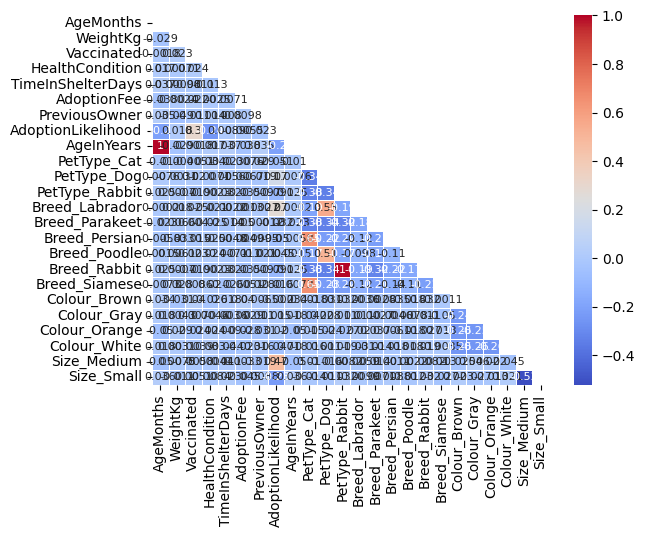

In [59]:
# visualize the correlations with a heatmap
# a quick way to mask the upper triangle
# get a feel for which variables are most correlated
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr,annot=True,mask=mask,cmap='coolwarm',annot_kws={"size": 8},linewidths=0.5)
plt.ylim(df_corr.shape[1],0);
plt.show()

It's difficult to make out with so many variables in one heatmap so it would be beneficial to show a smaller heatmap of certain variables of interest. Looking along the AdoptionLikelihood row: AgeMonths, Vaccinated and HealthCondition. Looking along the AdoptionLikelihood column: Size and PetType.

In [55]:
cols = ['AdoptionLikelihood', 'AgeMonths', 'Vaccinated', 'HealthCondition',
         'Size_Medium', 'Size_Small','PetType_Dog', 'PetType_Cat','PetType_Rabbit']
df_corr_1 = df_corr.loc[cols, cols]
df_corr_1

,AdoptionLikelihood,AgeMonths,Vaccinated,HealthCondition,Size_Medium,Size_Small,PetType_Dog,PetType_Cat,PetType_Rabbit
AdoptionLikelihood,1.000000,-0.202209,0.301311,-0.244061,0.466640,-0.227153,0.170754,-0.050898,-0.090893
AgeMonths,-0.202209,1.000000,-0.001801,0.017200,-0.049779,0.035654,0.007605,-0.010046,0.024892
Vaccinated,0.301311,-0.001801,1.000000,0.024079,-0.005791,0.005105,0.019981,-0.005087,-0.019256
HealthCondition,-0.244061,0.017200,0.024079,1.000000,-0.000439,-0.008416,-0.007078,0.034289,-0.002280
Size_Medium,0.466640,-0.049779,-0.005791,-0.000439,1.000000,-0.521924,-0.015905,0.010418,-0.008189
Size_Small,-0.227153,0.035654,0.005105,-0.008416,-0.521924,1.000000,-0.010721,-0.014217,0.032338
PetType_Dog,0.170754,0.007605,0.019981,-0.007078,-0.015905,-0.010721,1.000000,-0.343782,-0.338324
PetType_Cat,-0.050898,-0.010046,-0.005087,0.034289,0.010418,-0.014217,-0.343782,1.000000,-0.330881
PetType_Rabbit,-0.090893,0.024892,-0.019256,-0.002280,-0.008189,0.032338,-0.338324,-0.330881,1.000000


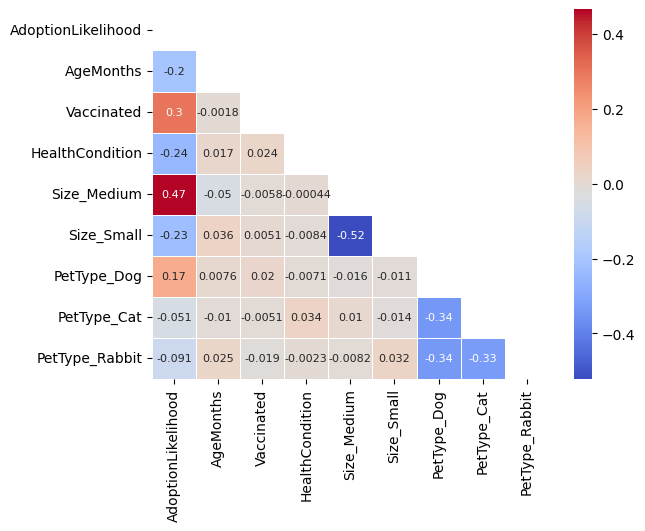

In [60]:
mask = np.zeros_like(df_corr_1, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr_1,annot=True,mask=mask,cmap='coolwarm',annot_kws={"size": 8},linewidths=0.5)
plt.ylim(df_corr_1.shape[1],0);
plt.show()

This is a much easier heatmap to visualise the variables that affect the adoption likelihood. The variables of interest are: age, vaccination, health condition, size and type of pet. 

Formulating Hypotheses:
1) younger animals are more likely to get adopted
2) vaccinated animals are more likely to get adopted
3) animals without a health condition are more likely to get adopted
4) larger animals are less likely to get adopted
5) some types of animal are more popular than others

